<a href="https://colab.research.google.com/github/Yumpop/colab_test/blob/main/K_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K -최근접 이웃 알고리즘

- 특성(feature) : 데이터의 특징

In [ ]:
# if fish_length>=30:
#   print('도미')

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

**선형** :  산점도의 그래프가 일직선의 가까운 형태

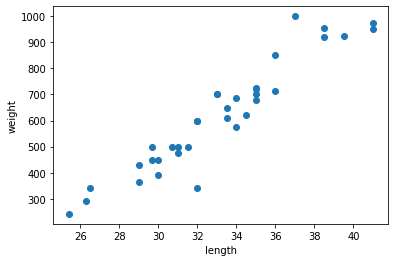

In [ ]:
import matplotlib.pyplot as plt # matplotlib 의 pylot 함수를 plt롤 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


**matplotlib** 에서 2개의 산점도를 한 그래프로 나타내기

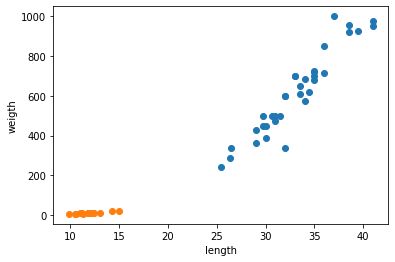

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()


- 지금 사용하는 머신러닝 패키지가 사이킷런 이므로 각 특성의 리스트들을 세로방향의 **2차원 리스트**를 만들어야함

- zip 함수 : 나열된 리스트에서 원소를 하나씩 꺼내주는 역할

In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]

print(fish_data)

- kn의 객체에 fish_data와 fist_targat을 전달해서 도미를 찾기위한 기준을 학습시키기<br/>
  위 과정을 훈련(training)라고 부른다 <br/>
  사이킷 런에서는 fit()함수가 이 역할을 함

- score()  = 사이킷 런에서 모델을 평가하는 메서드 <br/>
- score()함수로 나온 값을 정확도라고 함 (범위는 0~1 사이)


In [ ]:
fish_targat = [1] * 35 + [0] * 14
# print(fish_targat)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(fish_data, fish_targat)
kn.score(fish_data, fish_targat)

1.0

### k - 최근접 이웃 알고리즘 <br/>
- 원리 : 어떤 데이터에 대한 값을 구할 때 주변의 다른 데이터를 보고 다수를 차지하는 데이터를 정답으로 사용

- predict() : 새로운 정답을 예측, fit() 함수와 마찬가지로 2중리스트로 전달해야함 <br/>
 반횐된 값 array([1]) 에서 array는 나중에 설명!

In [ ]:
kn.predict([[30,600]])

array([1])

- k - 최근접 이웃 알고리즘 특징
1. 새로운 데이터를 예측할 때는 가장 가까운 직선거리의 데이터만 확인
2. 1의 특성으로 데이터가 많이 있는 경우 사용하기 어려움 (메모리가 많이 필요하고 직선거리 계산하는데 많은시간 필요함)
3. 실제로 훈련되는 과정이 없음
  - fit()메서드에 전달된 데이터를 가지고 새로운 데이터가 나타나면 가까운 데이터를 참고만 한다

- 몇개의 데이터를 참고하는가  -- 기본값은 5이다. <br/>
- 이 값은 n_neighbors매개변수로 변경 가능하다. 

만약 데이터를 49개 참고하게 된다면 어떤 데이터를 넣어도 도미로 예측 할 것<br/>
(49개의 데이터중 35개가 도미이기 때문)

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_targat)
kn49.score(fish_data, fish_targat)
print(35/49)

0.7142857142857143


위 셀에서 kn49.score(fish_data, fish_targat) 값과 print(35/49)값 둘다 출력 안 되는 이유
<br/> -- 코드 셀은 마지막 실행 코드의 반환값만 자동 출력

In [ ]:
for i in range(5,50):
  # k 최근접 이웃 개수 설정
  kn.n_neighbors = i  # 함수 사용방법 알기 
  # 점수 계산
  score = kn.score(fish_data, fish_targat)
  if score < 1:
    print(i, score)
    break

18 0.9795918367346939


# 훈련세트와 테스트 세트 - 새로운 파일에서 시작하기
<br/> 
깃허브 연동법 알고 나서 하기

- 머신러닝은 크게 지도학습과 비지도 학습으로 나뉜다. 
- 지도학습에서는 **입력(데이터)** 와 **타깃(정답)**이 있고 이 둘을 합쳐 **훈련데이터**라 부른다
- 비지도 학습은 타깃없이 데이터만 사용, 나중(6장)에서 공부할 예정
- 또한 강화학습이라는 것도 있는데 이 내용은 책에 안나옴
<br/>

- 위 모델에서는 훈련세트와 테스트세트가 같기 때문에 정확도가 100%가 나옴

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

하나의 생선데이터를 **샘플** 이라고 함<br/>
그래서 총 49개의 샘플이 존대하므로 처음 35개를 훈련세트로, 14개를 테스트세트로 사용

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)


0.0

***샘플링 편향 (sampling bias)***
- 테스트 세트에 특정 종류의 샘플이 과도하게 많으면 제대로 된 지도학습모델을 못 만듬
- 위 모델에서는 빙어샘플만 테스트 모델에 들어갔고 도미샘플은 훈련모델에만 들어가서 샘플링편향이 생김

###넘파이
- python의 대표 배열 라이브러리, 고차원의 배열을 주로 다루는데 사용
- seed() = 초깃값이 같으면 동일한 난수를 뽑을 수 있다.
- arange(시작숫자, 종료숫자, 간격) = 일정한 간격의 정수, 실수배열 만들기
- shuffle() = 주어진 배열을 랜덤하게 섞기, 다차원 배열일 경우 행에 대해서만 섞기


In [ ]:
import numpy as np

input_arr = np.array(fish_data) #2차원 리스트를 numpy배열로 바꾸기
targat_arr = np.array(fish_targat) # 2차원 리스트의 샘플(행), 특성(열)을 알 수 있다. 

#print(input_arr) 
#print(input_arr.shape) 

np.random.seed(42)  # random함수는 매번 수행할때마다 다른 값을 생성, 일정한 결과를 얻기 위해 random.seed함수 사용
index = np.arange(49)  # 0~48까지 총 49개의 인덱스를 생성
np.random.shuffle(index) # 무작위로 섞기

# print(index)
print(input_arr[[1,3]]) # 배열 인덱싱

[[ 26.3 290. ]
 [ 29.  363. ]]


numpy는 슬라이싱 외에 배열 인덱싱을 사용할수 있다.
<br/>


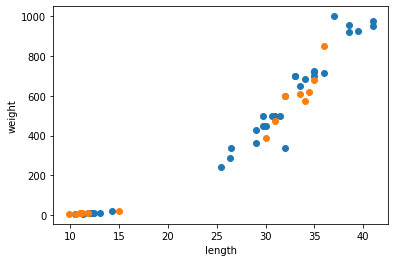

In [ ]:
from numpy.lib.polynomial import poly
train_input = input_arr[index[:35]]
train_targat = targat_arr[index[:35]]

# print(input_arr[13], train_input[0]) # 만들어진 인덱스중 0번째 인덱스가 13

test_input = input_arr[index[35:]]
test_targat = targat_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- 코랩은 셀의 마지막 결과를 자동으로 출력해 주기 때문에 print()함수는 필요없다.

In [ ]:
kn = kn.fit(train_input, train_targat)
kn.score(test_input,test_targat)

kn.predict(test_input)
test_targat

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 데이터 전처리

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

- numpy의 column_stack() : 전달받은 리스트를 일렬로 세운 다음 차례대로 연결한다
- 이때 리스트가 아닌 튜플로 전환한다. 
- 한번 만들어진 튜플은 수정할 수 없기 때문에 매개변수값으로 주로 사용
- numpy배열은 python리스트보다 데이터가 큰 경우 훨씬 효율적이다

In [ ]:
import numpy as np

#np.column_stack(([1,2,3,],[4,5,6])) # 튜플로 만듬, 한번 만들어진 튜플은 수정할 수 없기 때문에 매개변수값으로 주로 사용

fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

np.ones(), np.zeros()  = 각각 원하는 개수의 1 과 0을 채운 배열을 만듬

- np.concatenate() = 함수를 이어주는데 가로로 이어준다, np.column_stack와 마찬가지로 튜플로 전달
- np.column_stack() = 함수를 이어주는데 세로로 이어준다

ex) [1, 1, 1] , [0, 0, 0] 데이터를 합칠 때 
- np.concatenate() = [1, 1, 1, 0, 0, 0]
- np.column_stack() = <br/>
[[1,0], <br/>
[1,0]<br/>
[1,0]]


In [14]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


- .shape = 입력 데이터의 크기를 나타냄
- train_test_selection() = 전달되는 리스트를 비율에 맞게 나눠준다
  - 전에서 np.random.seed() 함수의 역할을 여기선 random.state()로 구현가능
  - 밑의 함수를 예로 들어 train_test_split()함수에 fish_data, fish_target 2개의 배열을 전달하므로 총 4개의 배열이 반환
  - train_test_split()는 기본적으로 25%를 테스트 세트로 구분


In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


- 랜덤으로 섞어서 샘플링편향이 생길수도 있음
  - stratify() 매개변수를 사용하여 클래스 비율에 맞게 데이터 나누기
  

In [30]:
print(test_target) # 샘플링 편향 발생

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42, stratify = fish_target)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


2번째 모델 만들기

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [24]:
print(kn.predict([[25,150]]))

[0.]


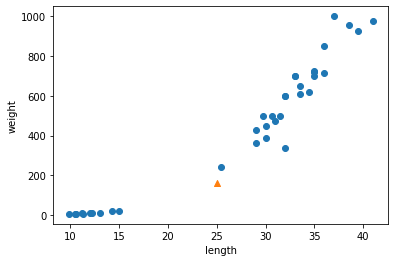

In [31]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])  #고차원 인덱싱 방법 찾아보기
plt.scatter(25,160,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- marker = 그래프에 다른 모양으로 포시해주는 매개변수


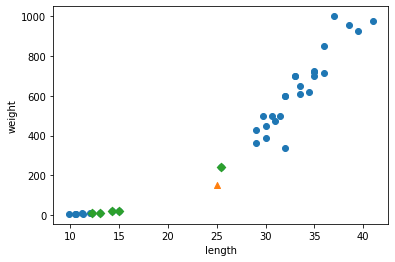

In [42]:
distance, index = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[index,0], train_input[index,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [40]:
print(train_input[index])
print(train_target[index])
print(distance)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- X축과 Y축의 거리비율이 다르기 때문에 (25,150) 좌표에서 오류
- lim() = 각 축의 범위 지정, x축 = xlim, y축 = ylim
- 이런 경우 두 특성의 ***스케일***이 다르다고 말한다

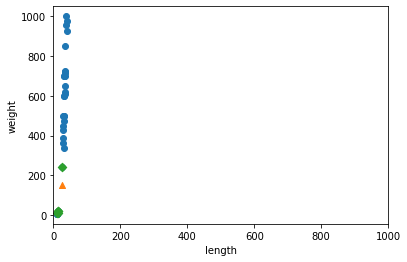

In [44]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')
plt.scatter(train_input[index,0], train_input[index,1], marker = 'D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<sup>p100</sup>
- 알고리즘이 거리기반일 경우 이런 사태가 많이 발생, 스케일을 맞춰주는 작업을 데이터 전처리라고 한다.
- 많이 사용하는 전처리 방법중 하나는 표준점수를 이용
- train_input()은 (36,2)크기의 배열, 특성마다 스케일이 다르므로 특성별로 계산해야 한다
- 이때 axis()함수를 이용, 0 이면 행을 따라서, 1이면 열을 따라서 통계값을 계산한다

### 브로드캐스팅  - p100
- numpy는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼준다. 
- 그 다음 std에 있는 표준편차를 모든 행에 적용
- 이러한 numpy의 기능을 브로드캐스팅(***broadcasting)***이라고 한다

In [46]:
mean = np.mean(train_input, axis = 0) # 평균
std = np.std(train_input, axis=0) # 표준편차
print(mean, std)
train_scale =(train_input - mean) / std

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


### 표준점수로 변환하여 모델 훈련시키기
- 샘플도 동일한 비율로 나눠주지 않아서 오류 발생


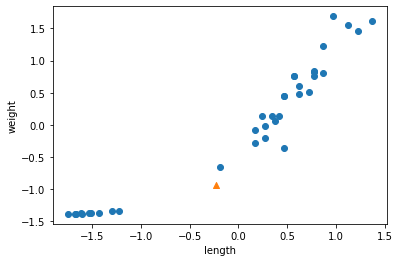

In [52]:
new = ([25,150]-mean) / std  # 샘플도 동일한 비율로 나눠주야 한다. 
plt.scatter(train_scale[:,0], train_scale[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
